# Fully Connected Neural Network

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import glob
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler

In [2]:
import pandas as pd
import numpy as np
import os
import glob

In [32]:
X = np.empty((420,2))
parent_folder_path = '/Users/nimitt/Documents/SRIP/SemiconductorFabricationGAA/Data_GAA/CSV_files'
folders = glob.glob(os.path.join(parent_folder_path, '*'))
for i in range(len(folders)):
    files = glob.glob(os.path.join(folders[i], '*'))
    files.sort()

    for j in range(5):
       
        path = files[j]
        path_break = path.split('/')
        features = np.array(list(map(float,path_break[-1][7:-4].split('_'))))
        X[5*i+j] = features

In [33]:
Y = np.empty((420,800))
parent_folder_path = '/Users/nimitt/Documents/SRIP/SemiconductorFabricationGAA/Data_GAA/CSV_files'
folders = glob.glob(os.path.join(parent_folder_path, '*'))
for i in range(len(folders)):
    files = glob.glob(os.path.join(folders[i], '*'))
    files.sort()

    for j in range(len(files)):
        path = files[j]
        data = pd.read_csv(path)
        Y[5*i+j] = data[' Metrology_Out']

In [34]:
X_fnn = X.copy()
Y_fnn = Y[:,165].reshape(-1,1)

In [35]:
X_scaler = MinMaxScaler()
X_fnn = X_scaler.fit_transform(X_fnn)

In [36]:
Y_scaler = MinMaxScaler()
Y_fnn = Y_scaler.fit_transform(Y_fnn)

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X_fnn, Y_fnn,train_size = 0.8)

# Tensorification

X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.float32)

train_dataset = TensorDataset(X_train, Y_train)
test_dataset = TensorDataset(X_test, Y_test)

train_loader = DataLoader(dataset=train_dataset, batch_size=50, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=50, shuffle=False)

In [38]:
class FNN2(nn.Module):
    def __init__(self):
        super(FNN2, self).__init__()
        self.fc1 = nn.Linear(2, 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)      
        return x
    
model2 = FNN2()
criterion = nn.MSELoss()
optimizer = optim.Adam(model2.parameters(), lr=0.01)

In [39]:

train_loss = []
test_loss = []
def train(model, criterion, optimizer, num_epochs):
   
    for epoch in range(num_epochs):
            
            
        # Forward pass
        outputs = model(X_train)
        loss = criterion(outputs, Y_train)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss.append(loss.item())
        with torch.no_grad():
            test_loss.append(criterion(model(X_test),Y_test))
            
        if (epoch+1) % 1 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}]], Loss: {loss.item():.7f}')

In [40]:
with torch.no_grad():
    out = model2(X_train)
    loss = criterion(out,Y_train)
    print(loss)

tensor(0.3047)


In [41]:
train(model2, criterion,optimizer,1000)

Epoch [1/1000]], Loss: 0.3047062
Epoch [2/1000]], Loss: 0.1496759
Epoch [3/1000]], Loss: 0.1389810
Epoch [4/1000]], Loss: 0.1254154
Epoch [5/1000]], Loss: 0.1017263
Epoch [6/1000]], Loss: 0.1124278
Epoch [7/1000]], Loss: 0.0922234
Epoch [8/1000]], Loss: 0.0851181
Epoch [9/1000]], Loss: 0.0806197
Epoch [10/1000]], Loss: 0.0633320
Epoch [11/1000]], Loss: 0.0618626
Epoch [12/1000]], Loss: 0.0444355
Epoch [13/1000]], Loss: 0.0405485
Epoch [14/1000]], Loss: 0.0294518
Epoch [15/1000]], Loss: 0.0345604
Epoch [16/1000]], Loss: 0.0206036
Epoch [17/1000]], Loss: 0.0267799
Epoch [18/1000]], Loss: 0.0176330
Epoch [19/1000]], Loss: 0.0197611
Epoch [20/1000]], Loss: 0.0146720
Epoch [21/1000]], Loss: 0.0118666
Epoch [22/1000]], Loss: 0.0093979
Epoch [23/1000]], Loss: 0.0107397
Epoch [24/1000]], Loss: 0.0093882
Epoch [25/1000]], Loss: 0.0105380
Epoch [26/1000]], Loss: 0.0061197
Epoch [27/1000]], Loss: 0.0074108
Epoch [28/1000]], Loss: 0.0045489
Epoch [29/1000]], Loss: 0.0068791
Epoch [30/1000]], Loss:

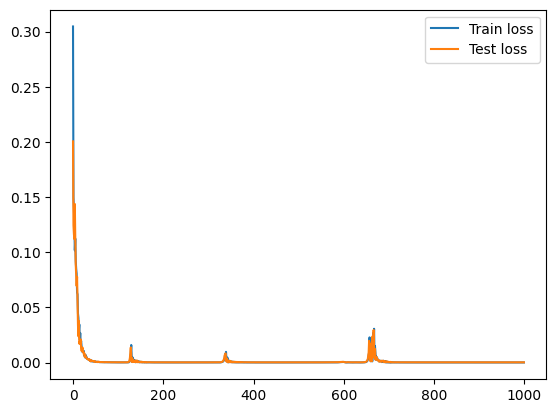

In [42]:
sr = np.arange(len(train_loss))
plt.plot(sr, train_loss,label = 'Train loss')
plt.plot(sr,test_loss, label = 'Test loss')
plt.legend()

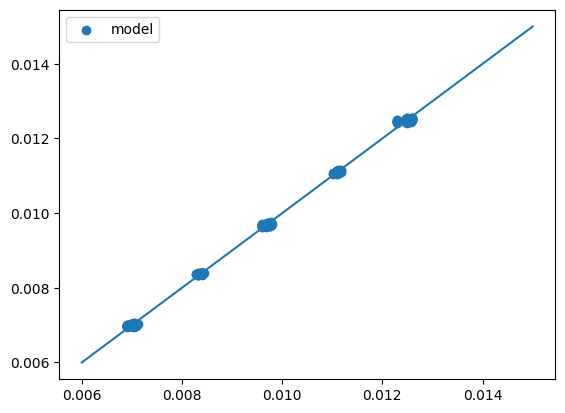

In [48]:
with torch.no_grad():
    y_hat = Y_scaler.inverse_transform(model2((X_train)))

plt.scatter(Y_scaler.inverse_transform(Y_train),y_hat,label='model')
plt.plot([0.006,0.015],[0.006,0.015])
plt.legend()
plt.show()

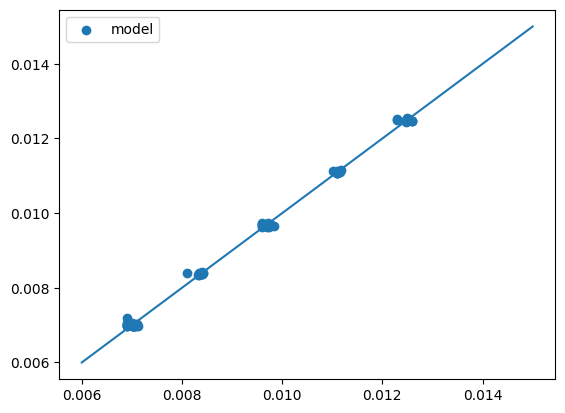

In [49]:
with torch.no_grad():
    y_hat = Y_scaler.inverse_transform(model2((X_test)))

plt.scatter(Y_scaler.inverse_transform(Y_test),y_hat,label='model')
plt.plot([0.006,0.015],[0.006,0.015])
plt.legend()
plt.show()